# TODO:
- Create model and layers
- Review the differences in layers (mostly looking at the first numerical argument in the layer creation)
- Use a subset of the train/test data to create MVP

In [1]:
import sklearn as sk
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Setup constants
IMAGE_SHAPE=(128, 128, 3)

DATA_DIR = '../data'
DATA_FABRICATED_DIR = os.path.join(DATA_DIR, 'fabricated')

#IMAGE_TEST_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_test')
IMAGE_TEST_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_test')
#IMAGE_VALIDATION_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_validation')
IMAGE_VALIDATION_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_validation')
#IMAGE_TRAIN_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_train')
IMAGE_TRAIN_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_train')

SAVED_MODEL_DIR = os.path.join(DATA_DIR, 'models')

In [3]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=[IMAGE_SHAPE[0], IMAGE_SHAPE[1], IMAGE_SHAPE[2]]))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  #optimizer=optimizers.RMSprop(lr=1e-4),
                  optimizer='rmsprop',
                  metrics=['acc'])
    return model

create_model()

In [4]:
def create_data_generator():
    # All images will be rescaled by 1./255
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            # This is the target directory
            IMAGE_TRAIN_DIR,
            target_size=[IMAGE_SHAPE[0], IMAGE_SHAPE[1]],
            batch_size=20,
            # Since we use binary_crossentropy loss, we need binary labels
            class_mode='binary')

    validation_generator = validation_datagen.flow_from_directory(
            IMAGE_VALIDATION_DIR,
            target_size=[IMAGE_SHAPE[0], IMAGE_SHAPE[1]],
            batch_size=20,
            class_mode='binary')
    
    return [train_generator, validation_generator]

create_data_generator()

Found 864 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [5]:
model = create_model()
train_generator, validation_generator = create_data_generator()

history = model.fit_generator(
      train_generator,
      epochs=80,
      validation_data=validation_generator
)

Found 864 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Epoch 1/80
44/44 [==============================] - 27s 608ms/step - loss: 7.6376 - acc: 0.4999 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 2/80
44/44 [==============================] - 26s 591ms/step - loss: 8.1492 - acc: 0.4888 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 3/80
44/44 [==============================] - 26s 587ms/step - loss: 8.0074 - acc: 0.4977 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 4/80
44/44 [==============================] - 26s 586ms/step - loss: 8.1492 - acc: 0.4888 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 5/80
44/44 [==============================] - 26s 588ms/step - loss: 8.0074 - acc: 0.4977 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 6/80
44/44 [==============================] - 26s 585ms/step - loss: 8.0074 - acc: 0.4977 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 7/80
44/44 [==============================] - 26s 596ms/step - loss: 8.0783 - acc: 0.4933 - val_loss: 7.6760 - val_

44/44 [==============================] - 27s 622ms/step - loss: 8.0074 - acc: 0.4977 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 62/80
44/44 [==============================] - 28s 626ms/step - loss: 7.9366 - acc: 0.5022 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 63/80
44/44 [==============================] - 28s 628ms/step - loss: 8.0074 - acc: 0.4977 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 64/80
44/44 [==============================] - 28s 632ms/step - loss: 8.0074 - acc: 0.4977 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 65/80
44/44 [==============================] - 26s 581ms/step - loss: 8.0783 - acc: 0.4933 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 66/80
44/44 [==============================] - 26s 584ms/step - loss: 8.0074 - acc: 0.4977 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 67/80
44/44 [==============================] - 26s 580ms/step - loss: 8.0783 - acc: 0.4933 - val_loss: 7.6760 - val_acc: 0.5185
Epoch 68/80
44/44 [==============================] - 26s 580ms/step - loss

In [6]:
train_generator, validation_generator = create_data_generator()
def show_images_for_generator(generator):
    cnt = 0
    batch = next(generator)
    print(batch[1])
    #print(batch[0][0])
    for img in batch[0]:
        cnt += 1
        plt.figure(cnt)

        imgplot = plt.imshow(array_to_img(img))
        if cnt == 5:
            break

Found 864 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.]


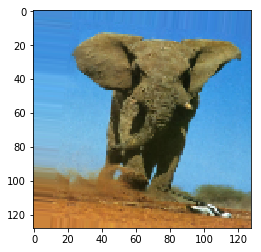

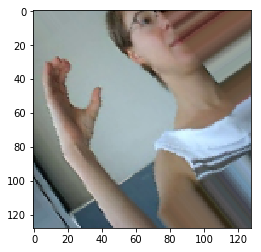

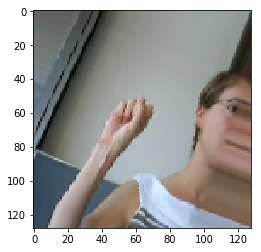

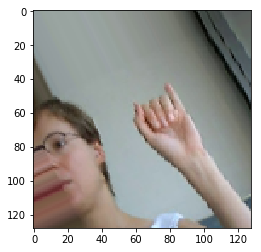

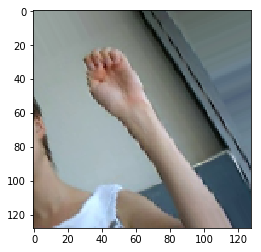

In [7]:
show_images_for_generator(train_generator)

In [8]:
# show_images_for_generator(validation_generator)

## Test Model

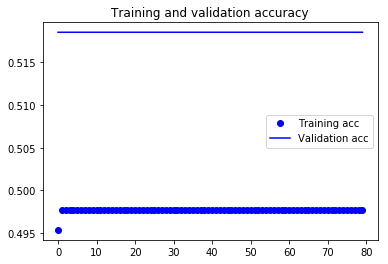

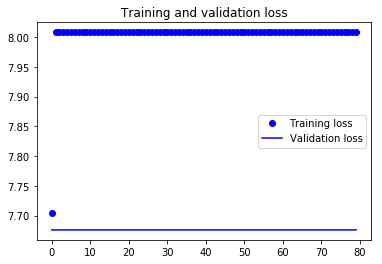

In [9]:
def desplay_trajectory(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
desplay_trajectory(history)

### Test model using unseen images

In [10]:

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        IMAGE_TEST_DIR,
        target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
        batch_size=82,
        class_mode='binary')

Found 82 images belonging to 2 classes.


In [11]:
predictions = model.predict_generator(test_generator)



In [12]:
test_generator.class_indices

{'hands': 0, 'not_hands': 1}

In [13]:
test_image_results = pd.DataFrame({
    'prediction': predictions.flatten(),
    'filename': test_generator.filenames
}) \
.sort_values('prediction', ascending=False)

test_image_results

filename  prediction
0                    hands/A7.jpg         1.0
61  not_hands/n00015388_28266.jpg         1.0
59  not_hands/n00015388_28030.jpg         1.0
58  not_hands/n00015388_27996.jpg         1.0
57  not_hands/n00015388_27976.jpg         1.0
56  not_hands/n00015388_27927.jpg         1.0
55  not_hands/n00015388_27626.jpg         1.0
54  not_hands/n00015388_27584.jpg         1.0
53  not_hands/n00015388_27523.jpg         1.0
52  not_hands/n00015388_27520.jpg         1.0
51  not_hands/n00015388_27504.jpg         1.0
50  not_hands/n00015388_27433.jpg         1.0
49  not_hands/n00015388_27300.jpg         1.0
48  not_hands/n00015388_27283.jpg         1.0
47  not_hands/n00015388_27277.jpg         1.0
46  not_hands/n00015388_27244.jpg         1.0
45  not_hands/n00015388_27231.jpg         1.0
44  not_hands/n00015388_27037.jpg         1.0
43  not_hands/n00015388_26983.jpg         1.0
60  not_hands/n00015388_28131.jpg         1.0
62  not_hands/n00015388_28292.jpg         1.0
1                    hands/B6.jpg         1.0
63  not_hands/n00015388_28324.jpg         1.0
80  not_hands/n00015388_29714.jpg         1.0
79  not_hands/n00015388_29628.jpg         1.0
78  not_hands/n00015388_29590.jpg         1.0
77  not_hands/n00015388_29587.jpg         1.0
76  not_hands/n00015388_29262.jpg         1.0
75  not_hands/n00015388_29239.jpg         1.0
74  not_hands/n00015388_29220.jpg         1.0
..                            ...         ...
10         hands/Hand_0004647.jpg         1.0
9          hands/Hand_0004628.jpg         1.0
8          hands/Hand_0004618.jpg         1.0
7                    hands/H4.jpg         1.0
6                    hands/G3.jpg         1.0
5                    hands/F7.jpg         1.0
4                    hands/E3.jpg         1.0
3                    hands/D7.jpg         1.0
2                    hands/C5.jpg         1.0
19         hands/Hand_0005700.jpg         1.0
20         hands/Hand_0005809.jpg         1.0
21         hands/Hand_0005852.jpg         1.0
31                   hands/M6.jpg         1.0
38                   hands/T3.jpg         1.0
37                   hands/S4.jpg         1.0
36                   hands/R5.jpg         1.0
35                   hands/Q8.jpg         1.0
34                   hands/P9.jpg         1.0
33                   hands/O8.jpg         1.0
32                   hands/N8.jpg         1.0
30                   hands/L8.jpg         1.0
22         hands/Hand_0005898.jpg         1.0
29                   hands/K5.jpg         1.0
28                   hands/I5.jpg         1.0
27         hands/Hand_0007750.jpg         1.0
26         hands/Hand_0007570.jpg         1.0
25         hands/Hand_0007075.jpg         1.0
24         hands/Hand_0006682.jpg         1.0
23         hands/Hand_0006404.jpg         1.0
81  not_hands/n00015388_29924.jpg         1.0

[82 rows x 2 columns]

In [14]:

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [15]:
fnames = [os.path.join(IMAGE_TEST_DIR, fname) for fname in test_image_results.filename]

imgs = [load_img(fname, target_size=(100,100)) for fname in fnames]
show_images(imgs, 5, test_image_results.prediction)

## Save Model

In [16]:
def ensure_model_directory_exists():
    try:
        os.mkdir(SAVED_MODEL_DIR)
    except:
        print('Tried to create "{}" but it already exists'.format(SAVED_MODEL_DIR))

def save_model():
    ensure_model_directory_exists()

    last_item_accuracy = history.history['acc'][-1]
    timestamp_raw = str(datetime.datetime.now())
    timestamp_without_milliseconds = timestamp_raw.split('.')[0]
    
    model_filename = '{}___{}.h5'.format(timestamp_without_milliseconds, last_item_accuracy)
    model_filepath = os.path.join(SAVED_MODEL_DIR, model_filename)
    
    print('saving file {}'.format(model_filepath))

    model.save(model_filepath)
save_model()

Tried to create "../data/models" but it already exists
saving file ../data/models/2018-10-08 16:18:11___0.4976851898762915.h5
